# <u>About Dataset</u>
https://www.kaggle.com/datasets/ucimachinelearning/eeg-alzheimers-dataset
<p>This dataset contains 848,640 records with 17 columns, representing EEG (Electroencephalogram) signals recorded from multiple electrode positions on the scalp, along with a status label. The dataset is be related to the study of Alzheimer’s Disease (AD).</p>

## Features (16 continuous variables, float64):
<p>Each feature corresponds to the electrical activity recorded from standard EEG electrode placements based on the international 10-20 system:</p>

<p>Fp1, Fp2, F7, F3, Fz, F4, F8

T3, C3, Cz, C4, T4

T5, P3, Pz, P4</p>

<p>These channels measure brain activity in different cortical regions (frontal, temporal, central, and parietal lobes).</p>

## Target variable (C4):

<p>C4: Represents the reading cetral electrode</p>

## Size & Integrity:

Rows: 848,640 samples

Columns: 17 (16 EEG features + 1 status label)

In [1]:
import pandas as Hamid 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn import metrics
from sklearn.metrics import r2_score,root_mean_squared_error, mean_absolute_error

In [2]:
df = Hamid.read_csv('AD_all_patients.csv')
df.head(10)

,Fp1,Fp2,F7,F3,Fz,F4,F8,T3,C3,Cz,C4,T4,T5,P3,Pz,P4,status
0,116.99375,41.09375,66.69375,-64.50625,-126.40625,8.39375,22.49375,42.19375,53.29375,4.49375,2.49375,73.79375,129.29375,0.09375,-124.90625,-245.50625,1
1,115.93125,38.63125,64.73125,-64.66875,-125.26875,8.73125,27.03125,43.23125,57.53125,11.13125,2.33125,72.23125,125.73125,-5.46875,-123.06875,-248.76875,1
2,115.72500,38.32500,66.02500,-62.67500,-135.37500,9.02500,29.42500,47.12500,49.92500,24.42500,1.22500,72.92500,123.22500,-3.07500,-129.97500,-246.27500,1
3,120.15625,40.75625,71.05625,-59.54375,-148.34375,12.15625,32.25625,49.05625,41.05625,12.75625,1.85625,73.55625,128.65625,-0.14375,-133.24375,-242.04375,1
4,119.50000,39.50000,71.30000,-59.20000,-125.50000,14.80000,28.50000,48.80000,42.20000,-1.20000,1.40000,70.30000,116.10000,3.40000,-129.00000,-240.90000,1
5,116.73750,35.93750,69.23750,-60.36250,-96.96250,13.53750,31.53750,46.83750,43.53750,5.33750,-0.36250,68.93750,103.83750,-1.66250,-130.56250,-245.56250,1
6,116.65000,32.45000,69.45000,-60.75000,-100.65000,10.95000,34.75000,47.35000,40.45000,2.95000,-1.85000,65.05000,131.95000,-4.95000,-131.65000,-252.15000,1
7,118.39375,32.79375,67.79375,-56.50625,-115.40625,18.09375,37.19375,53.19375,43.89375,1.89375,-0.80625,63.19375,132.99375,-8.50625,-131.40625,-256.80625,1
8,118.75000,32.15000,68.25000,-55.85000,-117.35000,16.15000,36.45000,54.45000,45.55000,5.05000,-1.15000,61.95000,132.45000,-9.15000,-132.15000,-255.55000,1
9,117.21875,33.61875,66.91875,-54.98125,-125.68125,16.91875,38.61875,54.01875,46.01875,6.61875,-1.58125,63.11875,124.71875,-3.98125,-130.58125,-250.98125,1


In [3]:
df

,Fp1,Fp2,F7,F3,Fz,F4,F8,T3,C3,Cz,C4,T4,T5,P3,Pz,P4,status
0,116.99375,41.09375,66.69375,-64.50625,-126.40625,8.39375,22.49375,42.19375,53.29375,4.49375,2.49375,73.79375,129.29375,0.09375,-124.90625,-245.50625,1
1,115.93125,38.63125,64.73125,-64.66875,-125.26875,8.73125,27.03125,43.23125,57.53125,11.13125,2.33125,72.23125,125.73125,-5.46875,-123.06875,-248.76875,1
2,115.72500,38.32500,66.02500,-62.67500,-135.37500,9.02500,29.42500,47.12500,49.92500,24.42500,1.22500,72.92500,123.22500,-3.07500,-129.97500,-246.27500,1
3,120.15625,40.75625,71.05625,-59.54375,-148.34375,12.15625,32.25625,49.05625,41.05625,12.75625,1.85625,73.55625,128.65625,-0.14375,-133.24375,-242.04375,1
4,119.50000,39.50000,71.30000,-59.20000,-125.50000,14.80000,28.50000,48.80000,42.20000,-1.20000,1.40000,70.30000,116.10000,3.40000,-129.00000,-240.90000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848635,16.32500,43.62500,68.62500,8.52500,-56.37500,0.82500,-17.77500,-50.47500,-56.17500,-21.67500,-23.67500,35.42500,-21.67500,22.02500,45.22500,7.22500,0
848636,16.24375,42.34375,70.64375,10.64375,-50.75625,1.84375,-22.85625,-49.25625,-53.55625,-22.15625,-21.65625,35.04375,-20.25625,16.74375,44.14375,2.84375,0
848637,13.93125,36.93125,72.73125,12.43125,-45.36875,3.13125,-28.26875,-48.66875,-45.36875,-24.36875,-17.46875,30.93125,-18.26875,11.93125,53.43125,-7.66875,0
848638,10.71875,32.71875,74.11875,13.01875,-43.88125,4.31875,-23.48125,-45.48125,-43.08125,-25.28125,-17.38125,26.51875,-18.58125,11.21875,53.61875,-9.08125,0


In [4]:
df.shape

(848640, 17)

In [5]:
df.columns

Index(['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4',
       'T4', 'T5', 'P3', 'Pz', 'P4', 'status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848640 entries, 0 to 848639
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Fp1     848640 non-null  float64
 1   Fp2     848640 non-null  float64
 2   F7      848640 non-null  float64
 3   F3      848640 non-null  float64
 4   Fz      848640 non-null  float64
 5   F4      848640 non-null  float64
 6   F8      848640 non-null  float64
 7   T3      848640 non-null  float64
 8   C3      848640 non-null  float64
 9   Cz      848640 non-null  float64
 10  C4      848640 non-null  float64
 11  T4      848640 non-null  float64
 12  T5      848640 non-null  float64
 13  P3      848640 non-null  float64
 14  Pz      848640 non-null  float64
 15  P4      848640 non-null  float64
 16  status  848640 non-null  int64  
dtypes: float64(16), int64(1)
memory usage: 110.1 MB


In [7]:
print(f'Total Number of Samples: {len(df)}')

Total Number of Samples: 848640


In [8]:
df.isna().sum()

Fp1       0
Fp2       0
F7        0
F3        0
Fz        0
F4        0
F8        0
T3        0
C3        0
Cz        0
C4        0
T4        0
T5        0
P3        0
Pz        0
P4        0
status    0
dtype: int64

In [9]:
df.isna().sum().sum()

0

In [10]:
df.duplicated().sum()

1036

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [14]:
for column in df.columns:
    print(df[column].value_counts())
    print()

Fp1
-2.418750e+01    138
-2.345000e+01    135
-2.346250e+01    132
-2.291875e+01    131
-2.280625e+01    131
                ... 
 2.900562e+02      1
 2.917000e+02      1
 2.856875e+02      1
 2.916187e+02      1
 3.330000e-15      1
Name: count, Length: 83732, dtype: int64

Fp2
-1.21250      145
-0.60625      144
-2.00625      144
-3.83125      144
-3.46875      143
             ... 
 356.43750      1
 357.55000      1
 360.68750      1
 361.80625      1
 67.90625       1
Name: count, Length: 71687, dtype: int64

F7
 0.38750      81
-7.89375      81
-3.73750      80
-5.30000      78
-14.90625     76
              ..
-293.01250     1
-298.65625     1
-297.20625     1
-292.75000     1
 64.82500      1
Name: count, Length: 63104, dtype: int64

F3
-4.968750e+00    113
-5.550000e+00    107
 2.412500e+00    106
-6.568750e+00    105
-2.025000e+00    103
                ... 
 1.194313e+02      1
 1.348063e+02      1
 1.352125e+02      1
 1.099062e+02      1
 2.000000e-15      1
Name: count, 

In [15]:
#  checking zero value in the int columns
j = 0
for i in df.columns:
    if (df[i].dtype == 'int64' and (df[i]==0).sum()!=0):
        print(j+1,'. ',i ,df[i].dtype ,(df[i]==0).sum())
        j=j+1 
print('\nTotal Features: ', j)

1 .  status int64 336384

Total Features:  1


In [16]:
#  checking zero value in the float columns
li = []
j = 0
for i in df.columns:
    if (df[i].dtype == 'float64' and (df[i]==0).sum()!=0):
        print(j+1,'. ',i ,df[i].dtype ,(df[i]==0).sum())
        li.append(i)
        j=j+1 
print('\nTotal Features: ', j)

1 .  Fp1 float64 6
2 .  Fp2 float64 13
3 .  F7 float64 7
4 .  F3 float64 15
5 .  Fz float64 11
6 .  F4 float64 10
7 .  F8 float64 8
8 .  T3 float64 13
9 .  C3 float64 11
10 .  Cz float64 9
11 .  C4 float64 15
12 .  T4 float64 5
13 .  T5 float64 7
14 .  P3 float64 13
15 .  Pz float64 10
16 .  P4 float64 5

Total Features:  16


In [17]:
print(li)

['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4']


In [18]:
for column in li:
    df= df[df[column] != 0]

In [19]:
#  checking zero value in the float columns
li = []
j = 0
for i in df.columns:
    if (df[i].dtype == 'float64' and (df[i]==0).sum()!=0):
        print(j+1,'. ',i ,df[i].dtype ,(df[i]==0).sum())
        li.append(i)
        j=j+1 
print('\nTotal Features: ', j)


Total Features:  0


In [20]:
df.shape

(847475, 17)

In [21]:
df.columns

Index(['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4',
       'T4', 'T5', 'P3', 'Pz', 'P4', 'status'],
      dtype='object')

In [22]:
# Correlation
correlation = df.corr()
correlation

,Fp1,Fp2,F7,F3,Fz,F4,F8,T3,C3,Cz,C4,T4,T5,P3,Pz,P4,status
Fp1,1.000000,-0.167968,0.054482,0.016878,-0.070499,-0.281675,-0.358478,-0.257422,-0.069543,0.323018,0.136078,0.182788,-0.309009,0.093882,-0.095012,-0.332336,0.064469
Fp2,-0.167968,1.000000,-0.350259,-0.335846,-0.129012,-0.016823,-0.298274,-0.314996,-0.183177,-0.294360,0.377005,0.227430,0.051499,0.329164,0.485983,0.139473,0.115043
F7,0.054482,-0.350259,1.000000,-0.071429,0.445313,0.207687,0.001650,0.198337,-0.167585,-0.071733,-0.400147,-0.125417,-0.160205,-0.193941,-0.561489,-0.020173,-0.025838
F3,0.016878,-0.335846,-0.071429,1.000000,-0.223635,-0.289216,0.056525,0.316848,0.007440,0.291120,-0.097411,-0.081204,-0.069203,0.043832,-0.163103,-0.313950,-0.044319
Fz,-0.070499,-0.129012,0.445313,-0.223635,1.000000,0.296602,-0.034302,0.134193,-0.107364,-0.423712,-0.455880,-0.004247,0.123354,-0.260171,-0.438441,0.033954,0.105811
F4,-0.281675,-0.016823,0.207687,-0.289216,0.296602,1.000000,0.106156,0.118212,0.030371,-0.351647,-0.337704,-0.169414,0.103237,-0.056206,-0.384156,0.133950,-0.200121
F8,-0.358478,-0.298274,0.001650,0.056525,-0.034302,0.106156,1.000000,0.289100,-0.149674,-0.120587,-0.424309,-0.523417,-0.049675,-0.448383,-0.208824,-0.167916,-0.133120
T3,-0.257422,-0.314996,0.198337,0.316848,0.134193,0.118212,0.289100,1.000000,-0.139139,-0.313247,-0.533362,-0.299381,0.291226,-0.245477,-0.459863,-0.151747,-0.220091
C3,-0.069543,-0.183177,-0.167585,0.007440,-0.107364,0.030371,-0.149674,-0.139139,1.000000,0.112221,-0.032885,0.208459,0.190665,0.032187,0.109735,-0.032553,-0.000382
Cz,0.323018,-0.294360,-0.071733,0.291120,-0.423712,-0.351647,-0.120587,-0.313247,0.112221,1.000000,0.308197,-0.033124,-0.545708,0.115128,0.159407,-0.220215,0.230071


<Axes: >

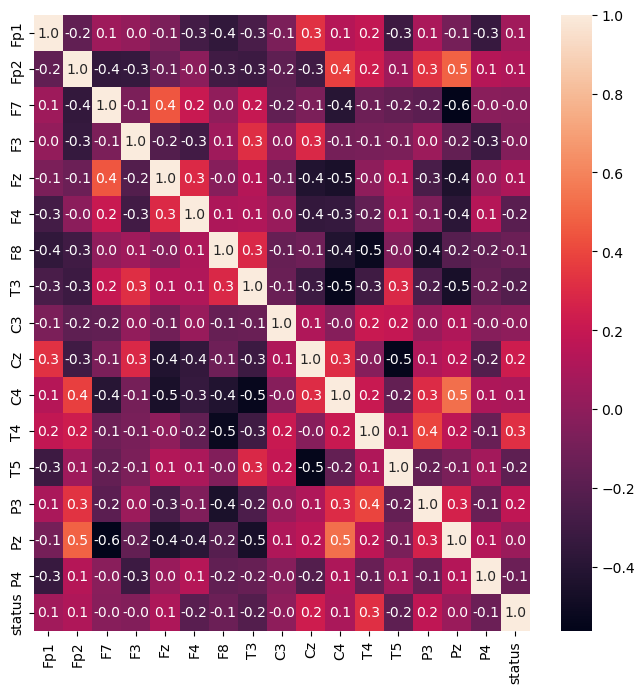

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,fmt='.1f',annot=True)

In [25]:
# this will suggest  the columns that have highest positive correlation
# li = []
j = 0
for column in df.columns:
    if ((correlation[column] >= 0.1).sum()) >= 8:
        print(j+1,'.',column,(correlation[column] >= 0.1).sum())
        # li.append(column)
        j = j+1

1 . Cz 8
2 . C4 8
3 . T4 9
4 . Pz 8


In [26]:
# this will suggest to which column should we drop
# li = []
j = 0
for column in df.columns:
    if ((correlation[column] <= 0).sum()) >= 9:
        print(j+1,'.',column,(correlation[column] <= 0).sum())
        # li.append(column)
        j = j+1

1 . Fp1 9
2 . Fp2 9
3 . F7 11
4 . F3 10
5 . Fz 10
6 . F4 9
7 . F8 12
8 . T3 10
9 . C3 9
10 . Cz 9
11 . T5 9
12 . P4 10


In [27]:
df.drop(['F8','F7','F3','Fz','T3','P4'],axis=1,inplace=True)

<Axes: >

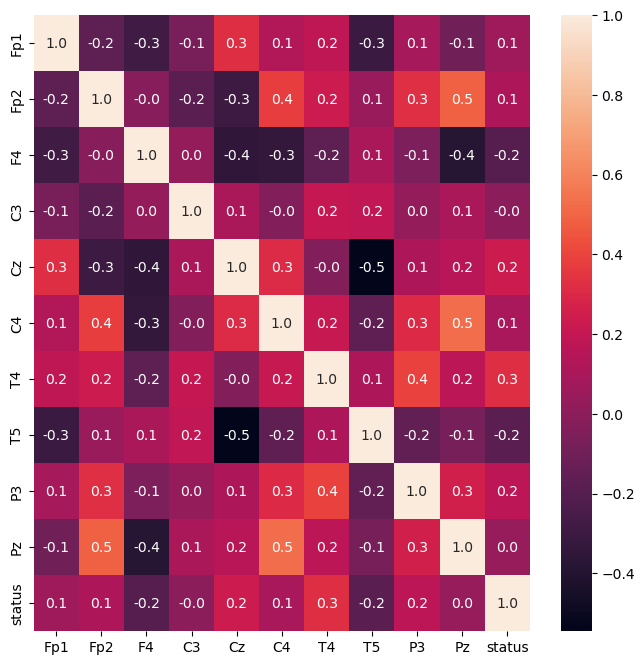

In [28]:
correlation = df.corr()

plt.figure(figsize=(8,8))
sns.heatmap(correlation,fmt='.1f',annot=True)

In [29]:
df.shape

(847475, 11)

# Data Splititing

In [30]:
df.columns

Index(['Fp1', 'Fp2', 'F4', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'status'], dtype='object')

In [31]:
X = df.drop('C4',axis=1)
Y = df['C4']

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847475 entries, 0 to 848639
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Fp1     847475 non-null  float64
 1   Fp2     847475 non-null  float64
 2   F4      847475 non-null  float64
 3   C3      847475 non-null  float64
 4   Cz      847475 non-null  float64
 5   T4      847475 non-null  float64
 6   T5      847475 non-null  float64
 7   P3      847475 non-null  float64
 8   Pz      847475 non-null  float64
 9   status  847475 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 71.1 MB


In [33]:
Y.info()

<class 'pandas.core.series.Series'>
Index: 847475 entries, 0 to 848639
Series name: C4
Non-Null Count   Dtype  
--------------   -----  
847475 non-null  float64
dtypes: float64(1)
memory usage: 12.9 MB


In [34]:
from sklearn.model_selection import train_test_split 

X_TRAIN ,X_TEST ,Y_TRAIN ,Y_TEST = train_test_split(X,Y,test_size=0.25,random_state=25)

print("Size of Train X =  " , len(X_TRAIN))
print("Size of Train Y =  " , len(Y_TRAIN))
print("Size of Test X =  " , len(X_TEST))
print("Size of Test Y =  " , len(Y_TEST))

Size of Train X =   635606
Size of Train Y =   635606
Size of Test X =   211869
Size of Test Y =   211869


# <u>Linear Regression </u>

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_TRAIN, Y_TRAIN) 

LinearRegression()

## Prediction on Train Data

In [36]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_TRAIN)
print(training_data_prediction)

[-1.18143379 -9.86116685 46.96290929 ...  3.10433829 -2.66988126
 -4.39558303]


In [37]:
# R squared error
score_1 = metrics.r2_score(Y_TRAIN, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TRAIN, training_data_prediction)

print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared :  0.43348724636663594
Mean Absolute Error :  30.26789881344985


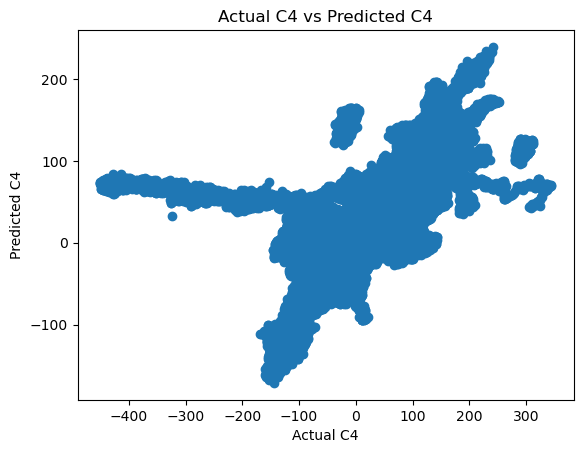

In [38]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual C4")
plt.ylabel("Predicted C4")
plt.title("Actual C4 vs Predicted C4")
plt.show()

# Prediciton on Test Data 

In [39]:
y_pred = model.predict(X_TEST)
y_pred

array([ 4.4563664 , 78.16775576, 13.67369866, ..., -3.23971953,
       -5.56817334, 48.44816075])

In [40]:
# R squared Score
score_1 = metrics.r2_score(Y_TEST, y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TEST, y_pred)

print("R squared Score : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared Score :  0.43693466838844086
Mean Absolute Error :  30.190130444022014


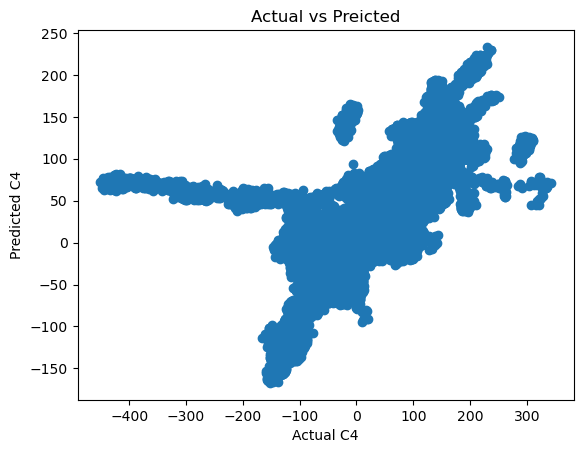

In [41]:
plt.scatter(Y_TEST, y_pred)
plt.xlabel("Actual C4")
plt.ylabel("Predicted C4")
plt.title("Actual vs Preicted")
plt.show()

# <u>SVM Regression</u> SVM-SVR was taking to much time!!

## Prediction on Train Data

## Preditction on Test Data

#  <u> REGRESSION DECISION TREE</u>

In [42]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor 
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 25)  
# fit the regressor with X and Y data 
regressor.fit(X_TRAIN, Y_TRAIN) 

DecisionTreeRegressor(random_state=25)

## Prediction on Train Data

In [43]:
# accuracy for prediction on training data
training_data_prediction = regressor.predict(X_TRAIN)
print(training_data_prediction)

[ 10.69375 -23.84375  44.05625 ... -55.725   -13.75    -94.9625 ]


In [44]:
#  R squared error
score_1 = metrics.r2_score(Y_TRAIN, training_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TRAIN, training_data_prediction)

print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared :  1.0
Mean Absolute Error :  4.460675401328014e-20


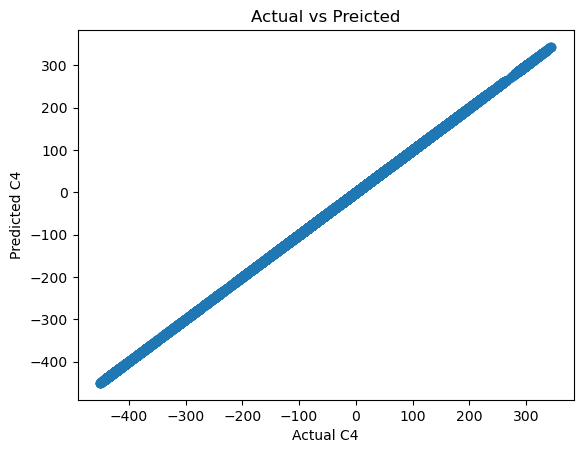

In [45]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual C4")
plt.ylabel("Predicted C4")
plt.title("Actual vs Preicted")
plt.show()

## Prediction on Test Data

In [46]:
y_pred = regressor.predict(X_TEST)
y_pred

array([  9.56875, 131.75   ,   2.29375, ..., -57.80625,  16.16875,
        -0.825  ])

In [47]:
#  R squared error
score_1 = metrics.r2_score(Y_TEST, y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TEST, y_pred)

print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared :  0.9865546847316575
Mean Absolute Error :  4.673123693178331


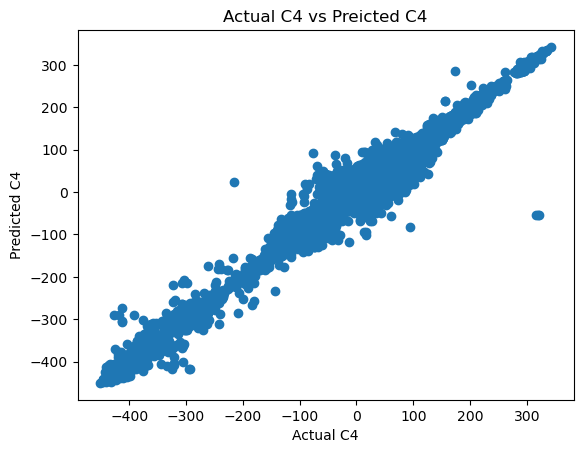

In [48]:
plt.scatter(Y_TEST, y_pred)
plt.xlabel("Actual C4")
plt.ylabel("Predicted C4")
plt.title("Actual C4 vs Preicted C4")
plt.show()

# <u> RANDOM FOREST</u>

In [49]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=5, random_state=25)
# fit the regressor with X and Y data 
regressor.fit(X_TRAIN, Y_TRAIN) 

RandomForestRegressor(n_estimators=5, random_state=25)

## Predicition on Train data

In [50]:
# accuracy for prediction on training data
training_data_prediction = regressor.predict(X_TRAIN)
print(training_data_prediction)

[  8.89    -24.025    43.995   ... -61.315   -13.75    -96.40875]


In [51]:
#  R squared error
score_1 = metrics.r2_score(Y_TRAIN, training_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TRAIN, training_data_prediction)

print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared :  0.9982873278210271
Mean Absolute Error :  1.559602788519932


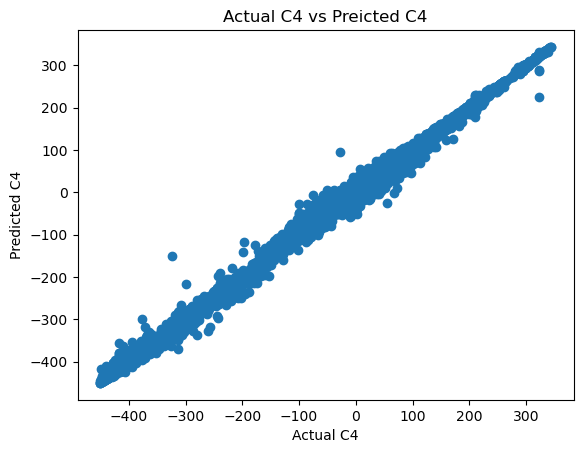

In [52]:
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual C4")
plt.ylabel("Predicted C4")
plt.title("Actual C4 vs Preicted C4")
plt.show()

## Prediction on Test Data

In [53]:
y_pred = regressor.predict(X_TEST)
y_pred

array([ 12.47625, 135.8575 ,  -9.7125 , ..., -67.115  ,  14.25125,
         0.48625])

In [54]:
#  R squared error
score_1 = metrics.r2_score(Y_TEST, y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TEST, y_pred)

print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared :  0.9920849837274155
Mean Absolute Error :  3.7538806290679614


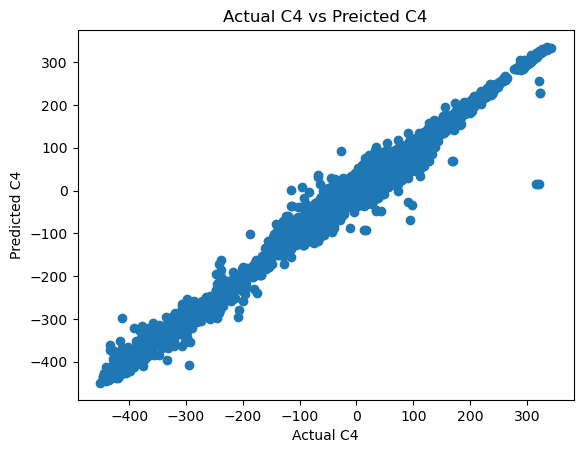

In [55]:
plt.scatter(Y_TEST, y_pred)
plt.xlabel("Actual C4")
plt.ylabel("Predicted C4")
plt.title("Actual C4 vs Preicted C4")
plt.show()

# <u>xgbost</u>

In [56]:
import xgboost as xgb 

xgb_model = xgb.XGBRegressor(objective='reg:squarederror',# specifies the objective of regression
                            n_estimators= 100,
                            learning_rate= 0.1,
                            max_depth= 3, 
                            random_state= 42)
xgb_model.fit(X_TRAIN,Y_TRAIN)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

## Prediction on trainig data

In [57]:
# accuracy for prediction on training data
training_data_prediction = xgb_model.predict(X_TRAIN)
print(training_data_prediction)

[  7.582054 -23.102024  44.08294  ... -81.98105  -25.102566 -92.13641 ]


In [58]:
# R squared Error (r2 score)
score_1 = metrics.r2_score(Y_TRAIN,training_data_prediction)

# Mean Absolute Error 
score_2 = metrics.mean_absolute_error(Y_TRAIN,training_data_prediction)

print("R2 Score            = ",score_1)
print("Mean Absolute Error = ",score_2)

R2 Score            =  0.9215922957597527
Mean Absolute Error =  12.534894021844543


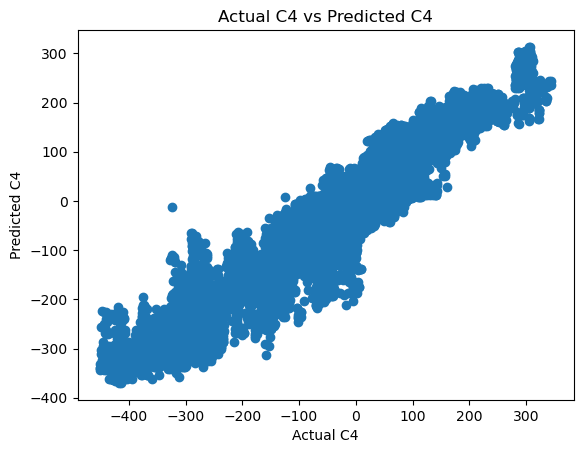

In [59]:
plt.scatter(Y_TRAIN,training_data_prediction)
plt.xlabel("Actual C4")
plt.ylabel("Predicted C4")
plt.title("Actual C4 vs Predicted C4")
plt.show()

## Prediction on Test Data

In [60]:
y_pred = xgb_model.predict(X_TEST)
y_pred

array([ 10.092434 , 139.30403  ,   2.245017 , ..., -60.965164 ,
         5.8470964,  19.848694 ], dtype=float32)

In [61]:
# R squared Error (r2 score)
score_1 = metrics.r2_score(Y_TEST,y_pred)

# Mean Absolute Error 
score_2 = metrics.mean_absolute_error(Y_TEST,y_pred)

print("R2 Score            = ",score_1)
print("Mean Absolute Error = ",score_2)

R2 Score            =  0.920165337921615
Mean Absolute Error =  12.598022632945776


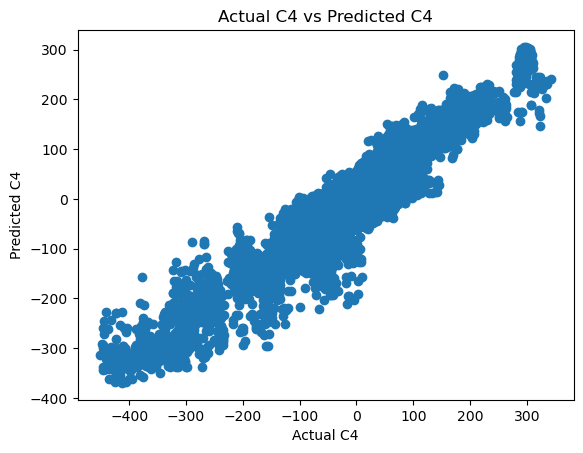

In [62]:
plt.scatter(Y_TEST,y_pred)
plt.xlabel("Actual C4")
plt.ylabel("Predicted C4")
plt.title("Actual C4 vs Predicted C4")
plt.show()